In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
#!python -m spacy download en_core_web_sm
spacy.cli.download("en_core_web_sm")



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 491.5 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 774.0 kB/s eta 0:00:17
      --------------------------------------- 0.3/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/12.8 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 5.3 MB/s eta 0:00:03
     -------- ------------------------------- 2.6/12.8 MB 5.6 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 6.0 M

In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

In [4]:
import os
 
# Get all book files in the data directory
books = 'new_testment.txt'
all_books = open(books, encoding="utf8").read()
book_doc = NER(all_books)


In [5]:
displacy.render(book_doc[0:20000], style="ent", jupyter=True)

In [6]:
book_doc.ents

(Matthew 1:1,
 Jesus Christ,
 David,
 Abraham,
 Matthew 1:2	,
 Abraham,
 Isaac,
 Isaac,
 Jacob,
 Jacob,
 Judah,
 Matthew 1:3,
 Judah,
 Perez,
 Zerah,
 Tamar,
 Perez,
 Hezron,
 Matthew 1:4,
 Amminadab,
 Amminadab,
 Nahshon,
 Nahshon,
 Salmon,
 Matthew 1:5,
 Salmon,
 Boaz,
 Rahab,
 Boaz,
 Ruth,
 Obed,
 Jesse,
 Matthew 1:6,
 Jesse,
 David,
 David,
 Solomon,
 Uriah,
 Matthew 1:7,
 Solomon,
 Rehoboam,
 Rehoboam,
 Abijah,
 Abijah,
 Matthew 1:8,
 Joram,
 Joram,
 Matthew 1:9,
 Uzziah,
 Jotham,
 Jotham,
 Ahaz,
 Ahaz,
 Hezekiah,
 Matthew 1:10,
 Hezekiah,
 Manasseh,
 Amos,
 Amos,
 Josiah,
 Matthew 1:11,
 Josiah,
 Jechoniah,
 Babylon,
 Matthew 1:12,
 Babylon,
 Jechoniah,
 Shealtiel,
 Zerubbabel,
 Matthew 1:13,
 Zerubbabel,
 Abiud,
 Abiud,
 Eliakim,
 Eliakim,
 Matthew 1:14,
 Azor,
 Zadok,
 Zadok,
 Achim,
 Eliud,
 Matthew 1:15,
 Eliud,
 Eleazar,
 Eleazar,
 Matthan,
 Matthan,
 Jacob,
 Matthew 1:16,
 Jacob,
 Joseph,
 Mary,
 Jesus,
 Matthew 1:17,
 Abraham,
 David,
 fourteen,
 David,
 Babylon,
 fourteen

In [7]:
names_list = []
for entity in book_doc.ents:
    if ':' in entity.text:
        continue
    if entity.label_ == 'PERSON':
    
        names_list.append(entity.text)


In [8]:
len(pd.Series(names_list).value_counts())

169

In [9]:
pd.Series(names_list).value_counts().index

Index(['Jesus', 'John', 'Peter', 'Luke', 'Behold', 'Simon', 'Mary', 'Sabbath',
       'David', 'Pharisees',
       ...
       'Mark', 'Thaddeus', 'Abiathar', 'Lo', 'the King of Israel', 'Haceldama',
       'Jesus the Galilean', 'Gethsemani', 'dumbstruck', 'Mary of Cleophas'],
      dtype='object', length=169)

In [10]:
for row, name in enumerate(pd.Series(names_list).value_counts().index):
    print(name)

Jesus
John
Peter
Luke
Behold
Simon
Mary
Sabbath
David
Pharisees
Son
Abraham
Herod
Joseph
Elijah
James
Simon Peter
Philip
Angel
Martha
Isaiah
Jacob
Pilate
Galilee
Andrew
Thomas
Mary Magdalene
Judas
Barabbas
Judas Iscariot
Judea
Elizabeth
John the Baptist
Sidon
Isaac
Solomon
Nazareth
Jesus of Nazareth
Hosanna
Blessed
Nathanael
Gospel
Noah
Jesus Christ
Lazarus
Matthew
Scriptures
James of Zebedee
Herodias
bush
James of Alphaeus
Zacchaeus
Jude
Zebedee
Bartholomew
Levi
Boaz
Amos
Babylon
Shepherd
Zerubbabel
Jesse
Eliakim
Perez
Nahshon
Apostles
Salt
Simeon
Hezekiah
Ahaz
Jotham
Joram
Rehoboam
Salmon
Daughter
Obed
Caesarea Philippi
Joanna
Jairus
Cyrene
Josiah
Abel
Mattathias
Bethsaida
Matthan
God
Eleazar
Eliud
Olivet
Abiud
Zadok
Jonah
Siloam
Gentiles
Genesaret
Nineveh
Terah
Enoch
Malchus
Eber
Joshua
Eliezer
Jorim
Cephas
Aram
Caesar
Menna
Samaria
Melea
Seth
Sell
Adam
Bethphage
Prophet
Elisha
Naaman
Nain
Jesus hid
Bethania
Magdalene
awaken
Susanna
John first
Word
wolf
Zachariah
Mary of James
Jesus

In [11]:
import pandas as pd

# Sample dictionary with names mapping
names_mapping = {
  "Jesus": ["Jesus", "Jesus Christ", "Jesus of Nazareth", "Jesus the Christ", "JESUS", "O Jesus", "Jesus the Galilean", "Nazarene"],
  "John": ["John", "John the Baptist", "John first"],
  "Peter": ["Peter", "Simon Peter", "Cephas"],
  "Mary": ["Mary"],
  "Mary Magdalene": ["Mary Magdalene", "Magdalene"],
  "Mary of James": ["Mary of James", "Mary of Cleophas"],
  "James of Zebedee": ["James of Zebedee", "James of Alphaeus"],
  "Judas": ["Judas"],
  "Judas Iscariot": ["Judas Iscariot"],
  "Joseph": ["Joseph"],
  "Joseph of Arimathea": ["Joseph of Arimathea"],
  "Philip": ["Philip"],
  "Andrew": ["Andrew"],
  "Thomas": ["Thomas"],
  "Martha": ["Martha"],
  "Lazarus": ["Lazarus"],
  "Simon": ["Simon"],
  "Thaddaeus": ["Thaddaeus"],
  "Bartholomew": ["Bartholomew"],
  "Matthew": ["Matthew", "Levi"],
  "Zachariah": ["Zachariah"],
  "Magi": ["Magi"],
  "Gabriel": ["Gabriel"],
  "Elizabeth": ["Elizabeth"],
  "Anna": ["Anna"],
  "Mark": ["Mark"],
  "Nathanael": ["Nathanael"],
  "Simeon": ["Simeon"],
  "Aaron": ["Aaron"],
  "Herod": ["Herod", "Herodias", "Archelaus"],
  "Caesar": ["Caesar"],
  "Jairus": ["Jairus"],
  "Pilate": ["Pilate"],
  "Barabbas": ["Barabbas"],
  "Emmanuel": ["Emmanuel"],
  "Ruth": ["Ruth"],
  "Rahab": ["Rahab"],
  "Bartimaeus": ["Bartimaeus"],
  "Solomon": ["Solomon"],
  "David": ["David"],
  "Abraham": ["Abraham"],
  "Isaac": ["Isaac"],
  "Jacob": ["Jacob"],
  "Moses": ["Moses"],
  "Isaiah": ["Isaiah"],
  "Elijah": ["Elijah"],
  "Elisha": ["Elisha"],
  "Jesse": ["Jesse"],
  "Hezekiah": ["Hezekiah"],
  "Ahaz": ["Ahaz"],
  "Jotham": ["Jotham"],
  "Joram": ["Joram"],
  "Rehoboam": ["Rehoboam"],
  "Salmon": ["Salmon"],
  "Obed": ["Obed"],
  "Perez": ["Perez"],
  "Nahshon": ["Nahshon"],
  "Zerubbabel": ["Zerubbabel"],
  "Zadok": ["Zadok"],
  "Joanna": ["Joanna"],
  "Boaz": ["Boaz"],
  "Joshua": ["Joshua"],
  "Enoch": ["Enoch"],
  "Malchus": ["Malchus"],
  "Jeremiah": ["Jeremiah"],
  "Zerah": ["Zerah"],
  "Judah": ["Judah"],
  "Achim": ["Achim"],
  "Shealtiel": ["Shealtiel"],
  "Jechoniah": ["Jechoniah"],
  "Uriah": ["Uriah"],
  "Phanuel": ["Phanuel"],
  "Zacchaeus": ["Zacchaeus"],
  "Eleazar": ["Eleazar"],
  "Abiud": ["Abiud"],
  "Abiathar": ["Abiathar"],
  "Mattathias": ["Mattathias"],
  "Matthan": ["Matthan"],
  "Aram": ["Aram"],
  "Menna": ["Menna"],
  "Terah": ["Terah"],
  "Eber": ["Eber"],
  "Eliezer": ["Eliezer"],
  "Melea": ["Melea"]
}


# Creating a reverse mapping from each alias to the main name
reverse_mapping = {}
for key, aliases in names_mapping.items():
    for alias in aliases:
        reverse_mapping[alias] = key

        

In [12]:

df = pd.DataFrame(names_list, columns=['Name'])
df['Count'] = df.groupby('Name')['Name'].transform('count')
df = df.drop_duplicates()

# Mapping names to their corresponding main names
df['Main Name'] = df['Name'].map(reverse_mapping)

# Grouping by the main name and summing counts
df_grouped = df.groupby('Main Name').agg({'Count': 'sum'}).reset_index()

# Adding a 'First Name' column which is the first word in the 'Main Name'
df_grouped['First Name'] = df_grouped['Main Name'].apply(lambda x: x.split()[0])

# Display the result
df_grouped

,Main Name,Count,First Name
0,Aaron,1,Aaron
1,Abiathar,1,Abiathar
2,Abiud,2,Abiud
3,Abraham,34,Abraham
4,Achim,1,Achim
...,...,...,...
78,Zacchaeus,3,Zacchaeus
79,Zachariah,1,Zachariah
80,Zadok,2,Zadok
81,Zerah,1,Zerah


In [13]:
character_df = pd.merge(df_grouped, df['Main Name']).drop_duplicates()
character_df.rename(columns={'Main Name': 'character', 'First Name':'character_firstname'}, inplace=True)

In [14]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [15]:
sent_entity_df

,sentence,entities
0,"(Matthew, 1:1, \t, The, book, of, the, lineage...","[Matthew 1:1, Jesus Christ, David, Abraham]"
1,"(Matthew, 1:2, \t, Abraham, conceived, Isaac, .)","[Matthew 1:2\t, Abraham, Isaac]"
2,"(And, Isaac, conceived, Jacob, .)","[Isaac, Jacob]"
3,"(And, Jacob, conceived, Judah, and, his, broth...","[Jacob, Judah]"
4,"(Matthew, 1:3, \t, And, Judah, conceived, Pere...","[Matthew 1:3, Judah, Perez, Zerah, Tamar]"
...,...,...
6555,"(But, Jesus, did, not, say, to, him, that, he,...",[Jesus]
6556,"(John, 21:24, \t)",[John 21:24]
6557,"(This, is, the, same, disciple, who, offers, t...",[]
6558,"(And, we, know, that, his, testimony, is, true...",[]


In [16]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
0,"(Matthew, 1:1, \t, The, book, of, the, lineage...","[Matthew 1:1, Jesus Christ, David, Abraham]","[David, Abraham]"
1,"(Matthew, 1:2, \t, Abraham, conceived, Isaac, .)","[Matthew 1:2\t, Abraham, Isaac]","[Abraham, Isaac]"
2,"(And, Isaac, conceived, Jacob, .)","[Isaac, Jacob]","[Isaac, Jacob]"
3,"(And, Jacob, conceived, Judah, and, his, broth...","[Jacob, Judah]","[Jacob, Judah]"
4,"(Matthew, 1:3, \t, And, Judah, conceived, Pere...","[Matthew 1:3, Judah, Perez, Zerah, Tamar]","[Judah, Perez, Zerah]"
5,"(And, Perez, conceived, Hezron, .)",[Perez],[Perez]
8,"(And, Amminadab, conceived, Nahshon, .)","[Amminadab, Nahshon]",[Nahshon]
9,"(And, Nahshon, conceived, Salmon, ., \n)","[Nahshon, Salmon]","[Nahshon, Salmon]"
11,"(And, Salmon, conceived, Boaz, by, Rahab, .)","[Salmon, Boaz, Rahab]","[Salmon, Boaz, Rahab]"
12,"(And, Boaz, conceived, Obed, by, Ruth, .)","[Boaz, Ruth]","[Boaz, Ruth]"


In [17]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\caoco\AppData\Local\Temp\ipykernel_21352\2127265797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [18]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [19]:
relationship_df = pd.DataFrame(relationships)


In [20]:
relationship_df

,source,target
0,David,Abraham
1,Abraham,Isaac
2,Isaac,Jacob
3,Jacob,Judah
4,Judah,Perez
...,...,...
3120,Jesus,Peter
3121,Peter,Jesus
3122,Peter,Jesus
3123,Jesus,Peter


In [21]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)


In [22]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [23]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

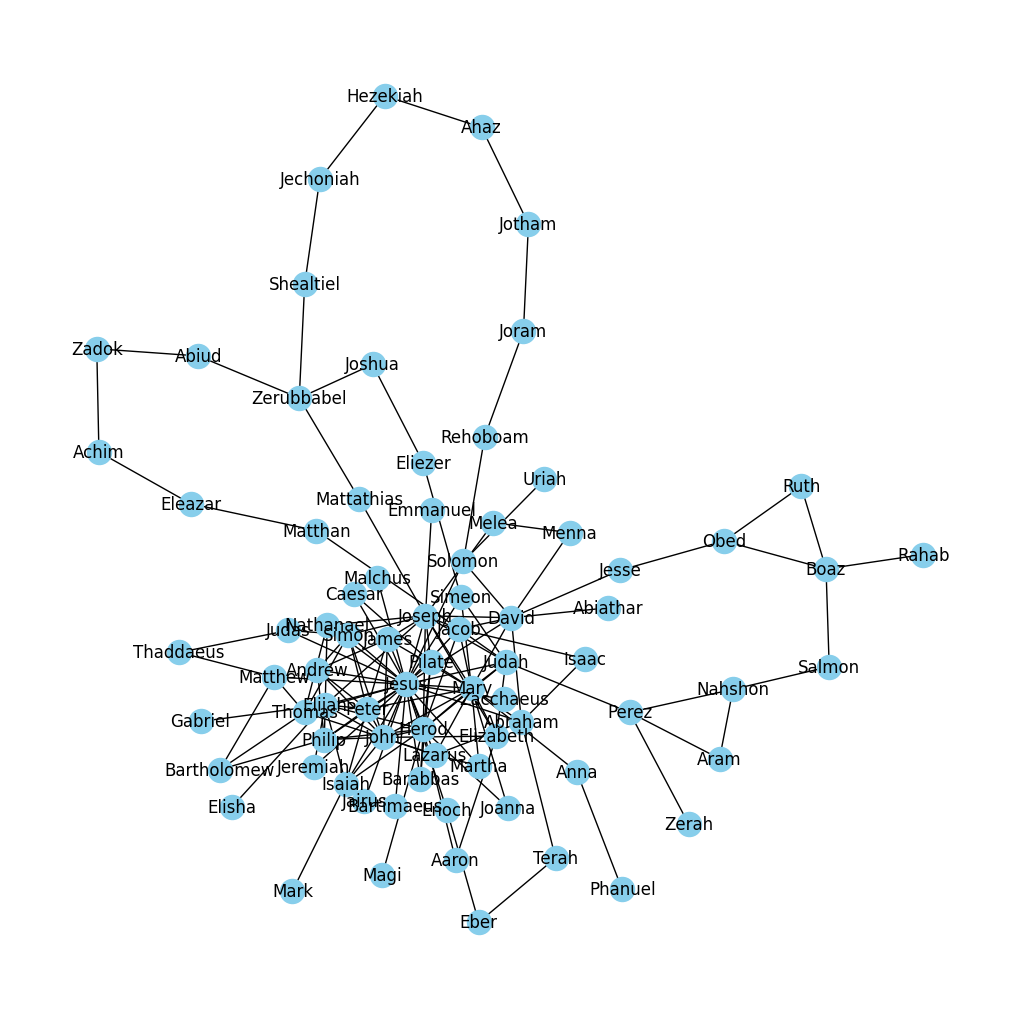

In [24]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [25]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("bible.html")

bible.html


In [26]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
pd.Series(degree_dict).sort_values(ascending=False).head(10)

Jesus     0.415584
Mary      0.220779
Joseph    0.194805
Herod     0.181818
John      0.155844
Elijah    0.116883
David     0.116883
Peter     0.116883
Jacob     0.103896
Judah     0.103896
dtype: float64

<AxesSubplot: >

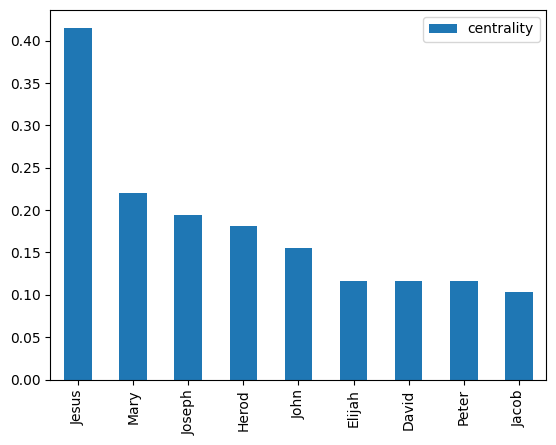

In [27]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

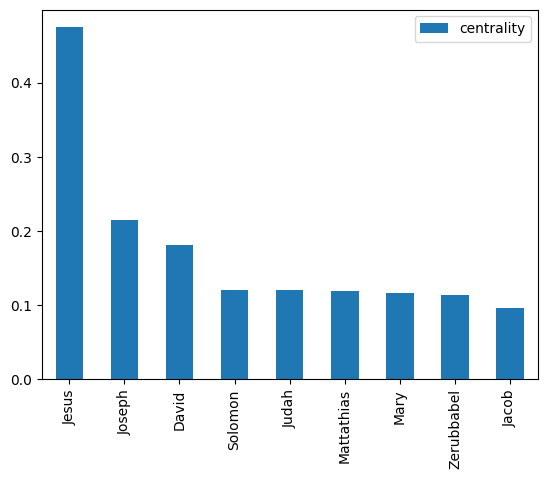

In [28]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

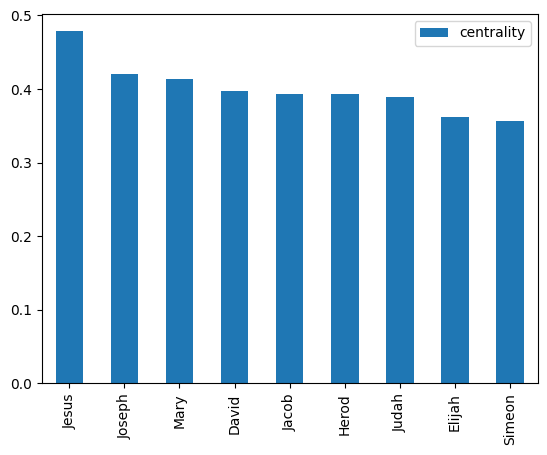

In [29]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [30]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [31]:
import community as community_louvain


In [32]:
communities = community_louvain.best_partition(G)
communities


{'Abraham': 0,
 'David': 0,
 'Isaac': 0,
 'Jacob': 0,
 'Judah': 0,
 'Perez': 1,
 'Zerah': 1,
 'Nahshon': 1,
 'Salmon': 1,
 'Boaz': 1,
 'Rahab': 1,
 'Ruth': 1,
 'Obed': 1,
 'Jesse': 1,
 'Solomon': 2,
 'Uriah': 2,
 'Rehoboam': 2,
 'Joram': 2,
 'Jotham': 2,
 'Ahaz': 2,
 'Hezekiah': 2,
 'Jechoniah': 2,
 'Shealtiel': 2,
 'Zerubbabel': 4,
 'Abiud': 4,
 'Zadok': 4,
 'Achim': 4,
 'Eleazar': 4,
 'Matthan': 4,
 'Joseph': 0,
 'Mary': 0,
 'Jesus': 5,
 'Emmanuel': 0,
 'Herod': 0,
 'Magi': 0,
 'Isaiah': 6,
 'John': 6,
 'Simon': 6,
 'Peter': 6,
 'Andrew': 6,
 'James': 6,
 'Matthew': 5,
 'Philip': 6,
 'Bartholomew': 5,
 'Thomas': 5,
 'Thaddaeus': 5,
 'Judas': 5,
 'Elijah': 6,
 'Jeremiah': 6,
 'Caesar': 5,
 'Pilate': 5,
 'Barabbas': 5,
 'Abiathar': 0,
 'Jairus': 5,
 'Mark': 6,
 'Bartimaeus': 5,
 'Aaron': 0,
 'Elizabeth': 0,
 'Gabriel': 6,
 'Simeon': 4,
 'Anna': 0,
 'Phanuel': 0,
 'Mattathias': 4,
 'Joshua': 4,
 'Eliezer': 4,
 'Melea': 0,
 'Menna': 0,
 'Aram': 1,
 'Terah': 3,
 'Eber': 3,
 'Enoch': 3,
 '

In [33]:
nx.set_node_attributes(G, communities, 'group')


In [35]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("bible_communities.html")

bible_communities.html


In [37]:
com_net.show("bible_communities.pdf")

bible_communities


AssertionError: invalid file type for bible_communities